## Inegi Jalisco Census Data

Goal
- Drive Insights with education and economics for each municipality in the Mexico state of Jalisco for a subequent geographic analysis. 

Approach:
1. First look at the pueblos by population strictly and split into quartiles based on population total s
2. Second look at specific municipalies and group them by that 
3. Finally look at specific pueblos and what each one says based on census data (this one will take the longest)

In [2]:
import pandas as pd
import numpy as np 

In [3]:
#load in the data
df = pd.read_csv('RESAGEBURB2020 - 14 Jalisco (1).csv')

In [4]:
df.head(5)

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POCUPADA,PEA,...,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
0,14,Jalisco,1,Acatic,1,Acatic,0194,18,33,33,...,21,0,0,0,7.76,8.38,7.21,*,1.82,66
1,14,Jalisco,1,Acatic,1,Acatic,0194,19,32,32,...,17,0,0,0,8.33,8.48,8.14,8,1.96,61
2,14,Jalisco,1,Acatic,1,Acatic,0194,2,23,24,...,18,*,0,*,6.51,5.91,7.14,6,3.26,55
3,14,Jalisco,1,Acatic,1,Acatic,0194,20,31,31,...,24,0,0,0,6.90,6.04,7.59,5,3.36,72
4,14,Jalisco,1,Acatic,1,Acatic,0194,21,32,33,...,19,*,0,*,6.89,6.47,7.38,11,3.03,61


In [5]:
#change dtypes of every column into an int64
print(df.dtypes)

ENTIDAD        int64
NOM_ENT       object
MUN            int64
NOM_MUN       object
LOC            int64
NOM_LOC       object
AGEB          object
MZA            int64
POCUPADA      object
PEA           object
PEA_F         object
PEA_M         object
PE_INAC       object
PE_INAC_F     object
PE_INAC_M     object
POCUPADA_F    object
POCUPADA_M    object
PDESOCUP      object
PDESOCUP_F    object
PDESOCUP_M    object
GRAPROES      object
GRAPROES_F    object
GRAPROES_M    object
P15YM_SE      object
PROM_HNV      object
POBTOT         int64
dtype: object


In [6]:
columns_to_convert = ['PEA', 'PEA_F', 'PEA_M', 'PE_INAC', 'PE_INAC_F',
       'PE_INAC_M', 'POCUPADA_F', 'POCUPADA_M', 'PDESOCUP', 'PDESOCUP_F',
       'PDESOCUP_M', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'P15YM_SE',
       'PROM_HNV', 'POBTOT']

In [7]:
#replace all the * with nan so that I can then change the object columns into float columns and work with them more flexibly
df.replace({'*': np.nan, '?': np.nan}, inplace=True)

In [8]:
df.replace({'N/D': np.nan, '?': np.nan}, inplace=True)

In [9]:
#val_to_find = 'N/D', df[columns_to_convert].loc['N/D'], matches = df.find_all

In [10]:
df[columns_to_convert] = df[columns_to_convert].astype('float')

In [11]:
df = df[['NOM_ENT', 'MUN', 'NOM_MUN', 'AGEB','PEA', 'PEA_F', 'PEA_M', 'PE_INAC', 'PE_INAC_F',
       'PE_INAC_M', 'POCUPADA_F', 'POCUPADA_M', 'PDESOCUP', 'PDESOCUP_F',
       'PDESOCUP_M', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M', 'P15YM_SE',
       'PROM_HNV', 'POBTOT']]

In [12]:
df = df.dropna()

In [13]:
df['NOM_MUN'].unique()

array(['Acatic', 'Atemajac de Brizuela', 'Tomatlán', 'Tonalá',
       'Zacoalco de Torres', 'Atenguillo', 'Zapopan', 'Zapotlanejo',
       'San Ignacio Cerro Gordo', 'Atotonilco el Alto', 'Atoyac',
       'Autlán de Navarro', 'Ayotlán', 'Ayutla', 'La Barca', 'Bolaños',
       'Acatlán de Juárez', 'Cabo Corrientes', 'Casimiro Castillo',
       'Cihuatlán', 'Encarnación de Díaz', 'Etzatlán', 'El Grullo',
       'Guachinango', 'Guadalajara', 'Ameca', 'Mexticacán', 'Mezquitic',
       'Mixtlán', 'Ocotlán', 'Ojuelos de Jalisco', 'Pihuamo', 'Poncitlán',
       'El Salto', 'San Cristóbal de la Barranca',
       'San Diego de Alejandría', 'San Juan de los Lagos', 'San Julián',
       'San Marcos', 'San Martín de Bolaños', 'San Martín Hidalgo',
       'Tepatitlán de Morelos', 'Tequila', 'Teuchitlán',
       'Tizapán el Alto', 'Tlajomulco de Zúñiga', 'San Pedro Tlaquepaque',
       'Tolimán'], dtype=object)

In [14]:
#change format options to supress scientic notation
pd.options.display.float_format = '{:.2f}'.format

In [15]:
print(df['POBTOT'].describe())

count     10867.00
mean       1063.37
std       28356.79
min           0.00
25%           0.00
50%          61.00
75%         118.00
max     1476491.00
Name: POBTOT, dtype: float64


In [16]:
#0-22,23-59,60-114,115- 1476491
Q1_boolean_search = (df['POBTOT'] < 22)
Q1_Pueblos = df[Q1_boolean_search]
Q1_Pueblos = Q1_Pueblos.dropna()

In [17]:
Q2_boolean = (df['POBTOT'] >= 22) & (df['POBTOT'] <= 59)
Q2_Pueblos = df[Q2_boolean]
Q2_Pueblos.head()

,NOM_ENT,MUN,NOM_MUN,AGEB,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,...,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
5,Jalisco,1,Acatic,0194,14.00,5.00,9.00,14.00,11.00,3.00,...,9.00,0.00,0.00,0.00,7.25,7.94,6.33,6.00,1.44,34.00
10,Jalisco,1,Acatic,0194,23.00,9.00,14.00,23.00,17.00,6.00,...,14.00,0.00,0.00,0.00,9.88,10.25,9.42,3.00,2.00,57.00
13,Jalisco,1,Acatic,0194,15.00,7.00,8.00,14.00,8.00,6.00,...,8.00,0.00,0.00,0.00,7.71,7.29,8.14,4.00,3.87,37.00
15,Jalisco,1,Acatic,0194,18.00,4.00,14.00,10.00,7.00,3.00,...,14.00,0.00,0.00,0.00,8.92,9.00,8.88,0.00,3.09,37.00
25,Jalisco,1,Acatic,0207,15.00,6.00,9.00,5.00,5.00,0.00,...,9.00,0.00,0.00,0.00,10.16,10.00,10.33,0.00,1.45,23.00


In [18]:
Q3_boolean = (df['POBTOT']>=60) & (df['POBTOT']<=114)
Q3_boolean

1         True
3         True
5        False
6         True
9         True
         ...  
29987    False
29990     True
29991    False
29992    False
29998    False
Name: POBTOT, Length: 10867, dtype: bool

In [19]:
Q3_Pueblo = df[Q3_boolean]

#Q3_Pueblo['NOM_MUN'].unique()

In [20]:
Q4_boolean = (df['POBTOT']>=115) & (df['POBTOT']<=1476491)
Q4_Pueblo = df[Q4_boolean]

In [21]:
Q1_Pueblos.describe()

,MUN,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
count,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00
mean,68.13,0.88,0.37,0.51,0.43,0.33,0.09,0.37,0.51,0.00,0.00,0.00,1.02,1.01,1.01,0.02,0.20,1.64
std,37.12,2.79,1.27,1.63,1.57,1.17,0.57,1.27,1.63,0.00,0.00,0.00,3.16,3.15,3.18,0.30,0.68,5.02
min,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,98.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,125.00,20.00,9.00,11.00,14.00,9.00,6.00,9.00,11.00,0.00,0.00,0.00,19.00,18.50,20.00,6.00,7.00,21.00


In [22]:
Q2_Pueblos.describe()

,MUN,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
count,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00,2307.00
mean,70.96,21.32,9.00,12.32,12.57,8.39,4.18,8.99,12.30,0.03,0.00,0.02,10.21,10.16,10.26,1.13,2.06,42.04
std,37.64,7.11,3.97,4.24,5.21,3.70,2.41,3.97,4.23,0.30,0.10,0.28,2.67,2.59,2.91,2.12,0.70,10.57
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.00
25%,39.00,16.00,6.00,9.00,9.00,6.00,3.00,6.00,9.00,0.00,0.00,0.00,8.23,8.27,8.15,0.00,1.57,34.00
50%,73.00,21.00,9.00,12.00,12.00,8.00,4.00,9.00,12.00,0.00,0.00,0.00,9.91,9.93,9.95,0.00,1.96,42.00
75%,101.00,26.00,12.00,15.00,16.00,11.00,6.00,12.00,15.00,0.00,0.00,0.00,12.23,12.14,12.42,3.00,2.47,51.00
max,125.00,51.00,29.00,32.00,32.00,22.00,15.00,29.00,32.00,5.00,4.00,5.00,16.70,16.92,17.91,14.00,5.59,59.00


In [23]:
Q3_Pueblo.describe()

,MUN,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
count,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00,2682.00
mean,74.11,43.62,18.46,25.16,23.98,16.38,7.60,18.44,25.06,0.12,0.02,0.10,9.79,9.71,9.87,2.69,2.15,84.26
std,37.68,10.93,6.38,6.25,7.93,5.73,3.49,6.37,6.23,0.66,0.22,0.61,2.37,2.29,2.56,2.91,0.57,15.64
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,60.00
25%,39.00,36.00,14.00,21.00,19.00,12.00,5.00,14.00,21.00,0.00,0.00,0.00,8.11,8.08,8.04,0.00,1.75,71.00
50%,94.00,43.00,18.00,25.00,23.00,16.00,7.00,18.00,25.00,0.00,0.00,0.00,9.27,9.26,9.36,3.00,2.13,83.00
75%,101.00,51.00,22.00,29.00,29.00,20.00,10.00,22.00,29.00,0.00,0.00,0.00,11.19,11.12,11.39,4.00,2.50,97.00
max,125.00,97.00,49.00,49.00,62.00,40.00,29.00,49.00,49.00,7.00,5.00,7.00,16.34,16.38,16.74,31.00,4.58,114.00


In [24]:
Q4_Pueblo.describe()

,MUN,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
count,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00,2820.00
mean,77.46,2077.92,889.70,1188.22,1111.84,759.32,352.51,880.39,1167.69,29.84,9.31,20.53,9.47,9.41,9.55,88.51,2.16,3981.44
std,36.34,29620.88,12994.60,16631.88,15646.72,10515.59,5135.19,12852.90,16345.44,428.53,141.86,287.04,1.84,1.76,1.99,1006.85,0.42,55569.52
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,115.00
25%,39.00,72.00,30.00,42.00,39.00,27.00,11.00,30.00,41.00,0.00,0.00,0.00,8.33,8.31,8.30,3.00,1.89,140.00
50%,97.00,95.00,41.00,55.00,53.00,37.00,17.00,41.00,54.00,0.00,0.00,0.00,9.11,9.05,9.18,6.00,2.18,182.00
75%,101.00,258.25,105.00,151.25,136.25,95.50,44.00,104.25,148.50,5.25,0.00,4.00,10.21,10.15,10.36,16.00,2.42,513.50
max,125.00,781705.00,342123.00,439582.00,415764.00,276832.00,138932.00,338284.00,432427.00,10994.00,3839.00,7357.00,16.02,15.96,16.27,25229.00,3.75,1476491.00


## Observations 
- Q1_Pueblos has 7305 records
- Q2_Pueblos has 7751 records
- Q3_Pueblos has 7505 records 
- Q4_Purblos has 7439 records

### Group by Pueblo Type

In [25]:
df.columns

Index(['NOM_ENT', 'MUN', 'NOM_MUN', 'AGEB', 'PEA', 'PEA_F', 'PEA_M', 'PE_INAC',
       'PE_INAC_F', 'PE_INAC_M', 'POCUPADA_F', 'POCUPADA_M', 'PDESOCUP',
       'PDESOCUP_F', 'PDESOCUP_M', 'GRAPROES', 'GRAPROES_F', 'GRAPROES_M',
       'P15YM_SE', 'PROM_HNV', 'POBTOT'],
      dtype='object')

In [26]:
pueblo_df = df
pueblo_df.describe()

,MUN,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
count,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00,10867.00
mean,72.63,554.76,237.45,317.31,297.23,202.96,94.27,235.03,311.96,7.78,2.42,5.36,7.33,7.28,7.38,23.88,1.59,1063.37
std,37.34,15114.20,6630.00,8487.06,7984.17,5366.20,2620.06,6557.71,8340.89,218.66,72.37,146.48,4.72,4.66,4.82,514.26,1.05,28356.79
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,93.00,31.00,13.00,18.00,17.00,11.00,5.00,13.00,18.00,0.00,0.00,0.00,8.58,8.59,8.59,0.00,1.86,61.00
75%,101.00,61.00,26.00,35.00,34.00,23.00,11.00,26.00,35.00,0.00,0.00,0.00,10.35,10.27,10.50,4.00,2.32,118.00
max,125.00,781705.00,342123.00,439582.00,415764.00,276832.00,138932.00,338284.00,432427.00,10994.00,3839.00,7357.00,19.00,18.50,20.00,25229.00,7.00,1476491.00


In [27]:
#grouping each pueblo and seeing their individual statistics
#Population over 15 without school, this is a measure of education in each pueblo sector 
pueblo_df.groupby(['NOM_MUN'])['P15YM_SE'].describe()

,count,mean,std,min,25%,50%,75%,max
NOM_MUN,,,,,,,,
Acatic,27.00,13.48,27.53,0.00,5.00,7.00,8.50,137.00
Acatlán de Juárez,113.00,13.42,56.85,0.00,0.00,0.00,3.00,523.00
Ameca,110.00,3.64,13.54,0.00,0.00,0.00,3.00,120.00
Atemajac de Brizuela,11.00,8.55,13.50,0.00,0.00,5.00,7.00,41.00
Atenguillo,17.00,0.76,1.71,0.00,0.00,0.00,0.00,5.00
Atotonilco el Alto,271.00,22.66,197.27,0.00,0.00,0.00,5.00,3027.00
Atoyac,42.00,13.14,62.70,0.00,0.00,3.00,6.75,409.00
Autlán de Navarro,383.00,13.00,122.40,0.00,0.00,0.00,3.00,1932.00
Ayotlán,237.00,22.86,166.52,0.00,0.00,3.00,6.00,2383.00


- PEA: Population over 12 that is economically active or has job
- PEA_F: Population over 12 that is economically active or has job for females
- PEA_M: Population over 12 that is economically active or has job for males
- PEA_INAC:Population over 12 that is NOT economically active 
- PE_INAC_F:Population over 12 that is NOT economically active for females
- PE_INAC_M:Population over 12 that is NOT economically active for males
- GRAPROES:Median school grade 
- GRAPROES_F: Median school grade for females
- GRAPROES_M: Median school grade for males
- P15YM_SE: Population over 15 without school
- PROM_HNV:Amount of children
- POBTOT: Total population 

In [28]:
#This is a groupme of the smallest traks we can look at
pueblo_df.groupby(['AGEB'])['P15YM_SE'].describe()

,count,mean,std,min,25%,50%,75%,max
AGEB,,,,,,,,
0000,86.00,2236.85,5362.13,22.00,171.50,485.00,1387.75,25229.00
0011,5.00,1.20,2.68,0.00,0.00,0.00,0.00,6.00
0021,20.00,14.90,39.73,0.00,4.00,5.00,6.25,182.00
0026,7.00,1.29,1.60,0.00,0.00,0.00,3.00,3.00
0027,12.00,2.92,5.09,0.00,0.00,0.00,4.25,15.00
...,...,...,...,...,...,...,...,...
5629,9.00,20.56,44.96,0.00,4.00,5.00,9.00,140.00
5633,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5648,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
pueblo_df.head()

,NOM_ENT,MUN,NOM_MUN,AGEB,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,...,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
1,Jalisco,1,Acatic,0194,32.00,15.00,17.00,16.00,13.00,3.00,...,17.00,0.00,0.00,0.00,8.33,8.48,8.14,8.00,1.96,61.00
3,Jalisco,1,Acatic,0194,31.00,7.00,24.00,31.00,21.00,10.00,...,24.00,0.00,0.00,0.00,6.90,6.04,7.59,5.00,3.36,72.00
5,Jalisco,1,Acatic,0194,14.00,5.00,9.00,14.00,11.00,3.00,...,9.00,0.00,0.00,0.00,7.25,7.94,6.33,6.00,1.44,34.00
6,Jalisco,1,Acatic,0194,53.00,20.00,33.00,30.00,23.00,7.00,...,33.00,0.00,0.00,0.00,7.49,8.08,6.90,5.00,2.07,105.00
9,Jalisco,1,Acatic,0194,32.00,13.00,19.00,33.00,21.00,12.00,...,19.00,0.00,0.00,0.00,7.67,8.29,7.07,8.00,2.21,75.00


In [30]:
#amount of children grouped on the municiple and ageb level
pueblo_df.groupby(['NOM_MUN'])['PROM_HNV'].describe()
pueblo_df.groupby(['AGEB'])['PROM_HNV'].describe()

,count,mean,std,min,25%,50%,75%,max
AGEB,,,,,,,,
0000,86.00,2.38,0.35,1.19,2.16,2.38,2.62,3.04
0011,5.00,1.90,1.28,0.00,1.56,1.88,2.62,3.42
0021,20.00,2.37,0.90,0.00,1.99,2.38,2.64,4.27
0026,7.00,1.38,1.32,0.00,0.00,1.93,2.45,2.85
0027,12.00,1.65,0.89,0.00,1.49,1.66,2.25,2.81
...,...,...,...,...,...,...,...,...
5629,9.00,2.26,0.28,1.83,2.11,2.22,2.39,2.78
5633,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5648,15.00,0.78,0.77,0.00,0.00,1.10,1.52,1.79


In [31]:

#correlation table for the non-gender granulated columns
pueblo_df[['PEA', 'PE_INAC','PDESOCUP','GRAPROES',
       'P15YM_SE', 'PROM_HNV', 'POBTOT']].corr()

,PEA,PE_INAC,PDESOCUP,GRAPROES,P15YM_SE,PROM_HNV,POBTOT
PEA,1.00,1.00,1.00,0.02,0.99,0.01,1.00
PE_INAC,1.00,1.00,1.00,0.02,0.99,0.02,1.00
PDESOCUP,1.00,1.00,1.00,0.02,0.99,0.01,1.00
GRAPROES,0.02,0.02,0.02,1.00,0.02,0.66,0.02
P15YM_SE,0.99,0.99,0.99,0.02,1.00,0.02,0.99
PROM_HNV,0.01,0.02,0.01,0.66,0.02,1.00,0.02
POBTOT,1.00,1.00,1.00,0.02,0.99,0.02,1.00


In [32]:
pueblo_df.tail()

,NOM_ENT,MUN,NOM_MUN,AGEB,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,...,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
29987,Jalisco,99,Tolimán,0081,12.00,6.00,6.00,4.00,4.00,0.00,...,6.00,0.00,0.00,0.00,8.56,9.27,7.00,0.00,3.45,22.00
29990,Jalisco,99,Tolimán,0081,31.00,11.00,20.00,31.00,25.00,6.00,...,20.00,0.00,0.00,0.00,8.36,8.53,8.12,5.00,2.44,85.00
29991,Jalisco,99,Tolimán,0081,72.00,26.00,46.00,48.00,36.00,12.00,...,46.00,0.00,0.00,0.00,7.58,7.76,7.38,8.00,2.28,165.00
29992,Jalisco,99,Tolimán,0081,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29998,Jalisco,99,Tolimán,0081,21.00,9.00,12.00,24.00,16.00,8.00,...,12.00,0.00,0.00,0.00,8.19,8.46,7.83,3.00,3.32,56.00


### Section 3 Preparing for linear regression 
- Goal: Seperate and clean dependent and non-dependent variables for testing and creating model
- Dep: Land use type
- Ind: PEA, PE_INAC, PDESOCUP,GRAPROES,P15YM_SE, PROM_HNV
- Note: best to use scikit-learn for the sake of this

In [89]:
#importing the relevent section 3 libraries 
import numpy as np
from sklearn.model_selection import train_test_split

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [90]:
#there seems to be a weird correlatory factor between these variables when looking at different sectors of population
lin_reg = Q1_Pueblos[['PE_INAC','GRAPROES']]
X = lin_reg['GRAPROES']
Y = lin_reg['PE_INAC']

In [91]:
#using the sklearn to seperate data into train, test, and split sizes for the regression to train the model
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.4, random_state= 23)

# using np.array to change the series data into workable arrays
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)


In [98]:
#importing the linear regression model itself 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

#the fit is the actual training that is going on
lr_model.fit(x_train,y_train)

c = lr_model.intercept_
m = lr_model.coef_
#intercept turned out to be 0.035
# the coeficcient or slope turned out to be 0.36


array([0.3696544])

In [107]:
#this is extra trying to figure out if we can actually predict any of this. We are essentally just using x training data (40 percent of it)
Y_pred_train = m*x_train + c
Y_pred_train.flatten()

array([0.03574999, 0.03574999, 0.03574999, ..., 0.03574999, 0.03574999,
       0.03574999])

In [108]:

#this command is the sklearn way of doing it on its own
Y_pred_train1 = lr_model.predict(x_train)
Y_pred_train1.flatten()

array([0.03574999, 0.03574999, 0.03574999, ..., 0.03574999, 0.03574999,
       0.03574999])

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

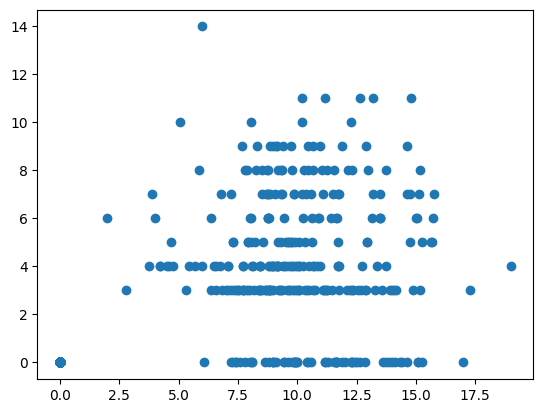

In [74]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.xlabel

In [35]:
#chage the ind series to an array for the sake of linear regression in the future 
series = df['PEA']
X_Var = series.to_numpy()
# y = 1 * x_0 + 2 * x_1 + 3


### Section 4 Look at the weighting options for the ses columns
- Step 1: look at the quartile data to hold constant
- Indipendent Variable:GRAPROES
- Dependant Variable:PEA_INAC
- Control Variable: POBTOT

In [36]:
Q1_Pueblos.describe()

,MUN,PEA,PEA_F,PEA_M,PE_INAC,PE_INAC_F,PE_INAC_M,POCUPADA_F,POCUPADA_M,PDESOCUP,PDESOCUP_F,PDESOCUP_M,GRAPROES,GRAPROES_F,GRAPROES_M,P15YM_SE,PROM_HNV,POBTOT
count,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00,3058.00
mean,68.13,0.88,0.37,0.51,0.43,0.33,0.09,0.37,0.51,0.00,0.00,0.00,1.02,1.01,1.01,0.02,0.20,1.64
std,37.12,2.79,1.27,1.63,1.57,1.17,0.57,1.27,1.63,0.00,0.00,0.00,3.16,3.15,3.18,0.30,0.68,5.02
min,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,39.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,73.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,98.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,125.00,20.00,9.00,11.00,14.00,9.00,6.00,9.00,11.00,0.00,0.00,0.00,19.00,18.50,20.00,6.00,7.00,21.00
